<a href="https://colab.research.google.com/github/WIEM-MOOT-HAD/seasame_ouvre_toi/blob/main/sesame_ouvre_toi_ML%2BSHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Set up colab and dataset

In [178]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# install librairies
!pip install pycaret
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
import shap
from datetime import datetime
from datetime import date
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import data
data1 = pd.read_csv("/content/drive/MyDrive/Sesame_ouvre_toi/data/compas-scores-raw.csv")

###### Some features Ingineering

In [5]:
#drop unusuful columns: 
data1.drop(['Person_ID','AssessmentID', 'Case_ID','LastName','FirstName', 'MiddleName', 'ScaleSet_ID','Scale_ID', "AssessmentReason",
           "Screening_Date","IsCompleted","IsDeleted"],
           axis=1, inplace=True)

In [6]:
data1.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Violence,-2.08,4,Low,New
1,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Recidivism,-1.06,2,Low,New
2,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Failure to Appear,15.00,1,Low,New
3,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Violence,-2.84,2,Low,New
4,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Recidivism,-1.50,1,Low,New


In [7]:
#manage ethnic code text column:
data1['Ethnic_Code_Text'].replace('African-Am','African-American')
data1['Ethnic_Code_Text'].replace('Arabic','Arabic-Oriental')
data1['Ethnic_Code_Text'].replace('Oriental','Arabic-Oriental')
data1['Ethnic_Code_Text'].value_counts()

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64

In [8]:
# drop nan values in "ScoreText" column
data1 = data1.dropna(subset=["ScoreText"])

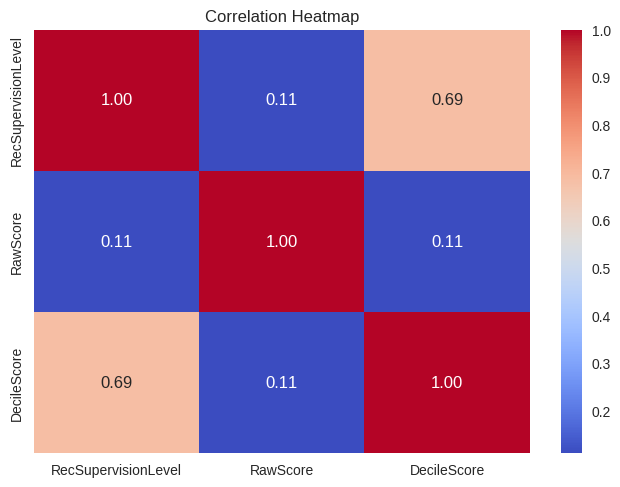

In [9]:
# show correlation matrix 
heatmap_data = data1

corr_matrix = heatmap_data.corr()

fig, ax = plt.subplots()
heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')

plt.show()

#### Auto ML using pycaret https://pycaret.org/

###### Train test split

In [10]:
# define features and target
X = data1.drop(["ScoreText","DecileScore"], axis = 1)
y = data1["ScoreText"]

In [11]:
# split data into train and test set with test size=33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### Classification using pycaret

In [12]:
s = setup(data= X_train, target = y_train, session_id = 123)

,Description,Value
0,Session id,123
1,Target,ScoreText
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(40734, 15)"
5,Transformed data shape,"(40734, 48)"
6,Transformed train set shape,"(28513, 48)"
7,Transformed test set shape,"(12221, 48)"
8,Ordinal features,4
9,Numeric features,2


In [13]:
# functional API
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:44:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# functional API
plot_model(best, plot = 'confusion_matrix')

###### Explane results using shap

In [ ]:
best_model = automl(optimize='Accuracy')#.best_model

In [ ]:
explainer_best_model = shap.Explainer(best_model,x_train)

In [ ]:
shap_values = explainer_best_model.shap_values(x_train,check_additivity=False )

In [ ]:
shap.summary_plot(shap_values, x_train)#, feature_names=X_train.feature_names)

#### Random Forest

###### Prepare data

In [14]:
# encode columns using label encoder 
le = preprocessing.LabelEncoder()

In [15]:
data1["Agency_Text"] = le.fit_transform(data1["Agency_Text"])
data1["Sex_Code_Text"] = le.fit_transform(data1["Sex_Code_Text"])
data1["Ethnic_Code_Text"] = le.fit_transform(data1["Ethnic_Code_Text"])
data1["RecSupervisionLevelText"] = le.fit_transform(data1["RecSupervisionLevelText"])
data1["ScaleSet"] = le.fit_transform(data1["ScaleSet"])
data1["Language"] = le.fit_transform(data1["Language"])
data1["LegalStatus"] = le.fit_transform(data1["LegalStatus"])
data1["CustodyStatus"] = le.fit_transform(data1["CustodyStatus"])
data1["MaritalStatus"] = le.fit_transform(data1["MaritalStatus"])
data1["DisplayText"] = le.fit_transform(data1["DisplayText"])
data1["ScoreText"] = le.fit_transform(data1["ScoreText"])
data1["AssessmentType"] = le.fit_transform(data1["AssessmentType"])

In [16]:
data1.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,2,1,4,12/05/92,1,0,5,0,4,1,1,2,-2.08,4,1,1
1,2,1,4,12/05/92,1,0,5,0,4,1,1,1,-1.06,2,1,1
2,2,1,4,12/05/92,1,0,5,0,4,1,1,0,15.00,1,1,1
3,2,1,4,09/16/84,1,0,5,0,1,1,1,2,-2.84,2,1,1
4,2,1,4,09/16/84,1,0,5,0,1,1,1,1,-1.50,1,1,1


In [17]:
# Random Forest Classifier
clf = RandomForestClassifier()

#### à réexécuter

In [18]:
# define target and features
x = data1.drop(["ScoreText", "DateOfBirth", "DecileScore", "RawScore","DateOfBirth", "DecileScore", "RawScore", "RecSupervisionLevelText", "DisplayText"], axis =1) 


y = data1["ScoreText"]

###### Train test split

In [19]:
# Train test split using new features   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

###### Fit model and make prediction

In [20]:
# Fit model to make prediction 
y_predict = clf.fit(x_train, y_train).predict(x_test)

###### Reporting

In [21]:
# Classification report 
report_df = pd.DataFrame.from_dict(classification_report(y_test, y_predict, output_dict=True)).transpose()

In [22]:
report_df

,precision,recall,f1-score,support
0,0.523077,0.785185,0.627875,2295.000000
1,0.870720,0.837899,0.853994,13689.000000
2,0.510447,0.431127,0.467446,4080.000000
accuracy,0.749153,0.749153,0.749153,0.749153
macro avg,0.634748,0.684737,0.649772,20064.000000
weighted avg,0.757694,0.749153,0.749526,20064.000000


<Axes: >

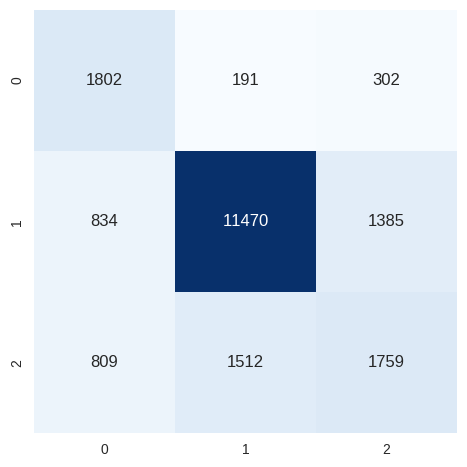

In [23]:
#confusion matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

In [24]:
precision = precision_score(y_test, y_predict,average='macro')
recall = recall_score(y_test, y_predict,average='macro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6347480769978352
Recall: 0.6847372263976085


###### Explane results using Shap

In [25]:
explainer = shap.Explainer(clf,x_train)

In [ ]:
shap_values = explainer.shap_values(x_test)

 26%|=====               | 15830/60192 [13:00<36:25]       

In [ ]:
le.classes_

In [ ]:
shap.summary_plot(shap_values, x_test)#, feature_names=X_train.feature_names)

In [ ]:
tree_explainer = shap.TreeExplainer(clf)
tree_values = tree_explainer.shap_values(x_train)

In [ ]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=0)
    importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 

In [ ]:
shap_feature_importance(tree_values, X_train)

In [ ]:

def shap_dependance_plot(feature1, values, X, feature2 = None):
    if feature2 is None:
        shap.dependence_plot(feature1, values, X)
    else :
        shap.dependence_plot(feature1, values, X, interaction_index=feature2)
    return


In [ ]:
for feature in shap_feature_importance(tree_values, X_train).column_name.tolist():
    shap_dependance_plot(feature, tree_values, X_train)

In [ ]:
def shap_force_plot(explainer, values, X):
    """
    shap_value can be an element of explainer.shap_values(train_X) or subset
    """
    shap.initjs()
    display(shap.force_plot(explainer.expected_value, values, X))
    return


In [ ]:
index=1
tree_values_array = np.array(tree_values)

print("Predicted value is:", y_pred[index])
shap_force_plot(tree_explainer, tree_values_array[index, :], X_train.iloc[index, :])


###### Sampling

In [161]:
ethnicity_classes = data1["Ethnic_Code_Text"].unique()

In [164]:
data1["Ethnic_Code_Text"].value_counts()

1    27002
4    21765
5     8733
8     2590
3      324
6      219
2       75
0       51
7       39
Name: Ethnic_Code_Text, dtype: int64

In [165]:
sample_size = 39
subsamples = []
for ethnicity_class in ethnicity_classes:
    subset = data1[data1['Ethnic_Code_Text'] == ethnicity_class]
    
    random_subset = subset.sample(n=sample_size, random_state=123)
    
    subsamples.append(random_subset)

subsampled_data = pd.concat(subsamples)

In [166]:
subsampled_data.shape

(351, 16)

In [167]:
subsampled_data.drop(["DateOfBirth", "DecileScore", "RawScore", "RecSupervisionLevelText","RecSupervisionLevel","DisplayText"],
                     axis=1, inplace=True)

In [169]:

X = subsampled_data.drop('ScoreText', axis=1)  
y = subsampled_data['ScoreText']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [170]:
report_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).transpose()

In [171]:
report_df

,precision,recall,f1-score,support
0,0.222222,0.181818,0.200000,11.000000
1,0.759259,0.803922,0.780952,51.000000
2,0.000000,0.000000,0.000000,9.000000
accuracy,0.605634,0.605634,0.605634,0.605634
macro avg,0.327160,0.328580,0.326984,71.000000
weighted avg,0.579812,0.605634,0.591952,71.000000


<Axes: >

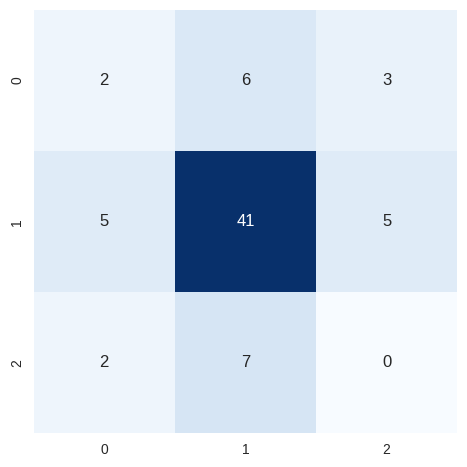

In [172]:
#confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

In [173]:
explainer = shap.Explainer(model,x_train)

In [174]:
shap_values = explainer.shap_values(x_test)

100%|===================| 60188/60192 [09:38<00:00]       

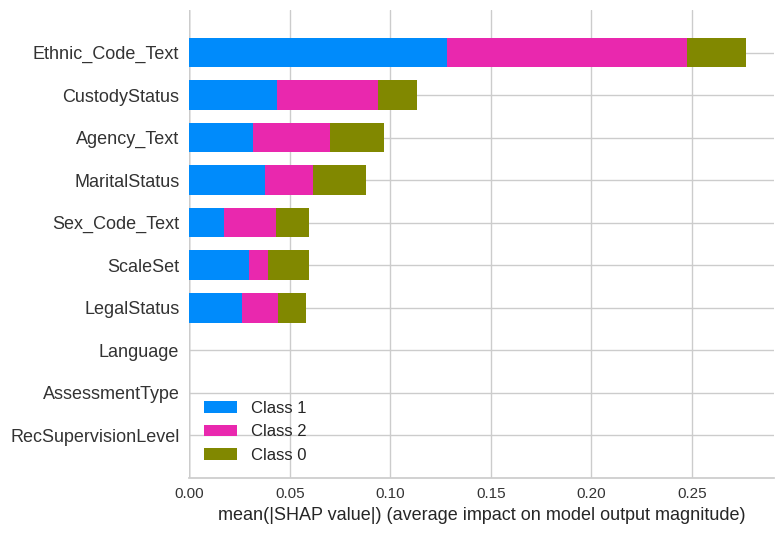

In [176]:
shap.summary_plot(shap_values, x_test)#, feature_names=X_train.feature_names)

###### Equity Index

In [138]:
X_test["Ethnic_Code_Text"].value_counts()

1    31
4    16
5    12
8     1
Name: Ethnic_Code_Text, dtype: int64

In [100]:
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred, columns=["y_pred"]) 

Decoding "Ethinc text Code" lasses: 
* 0	African-American
* 1	Arabic-Oriental
* 2	Asian
* 3	Caucasian
* 4	Hispanic
* 5	Native American
* 6	Other

Decoding Target:
* 0	High
* 1	Low
* 2	Medium

In [140]:
X_test["Ethnic_Code_Text"].value_counts()

1    31
4    16
5    12
8     1
Name: Ethnic_Code_Text, dtype: int64

In [147]:
df_y_pred = pd.DataFrame(y_pred, columns=["y_pred"])

In [152]:
X_test["y_pred"]= y_pred

In [157]:
X_test[X_test["Ethnic_Code_Text"]==1]["y_pred"].value_counts()

2    16
0    11
1     4
Name: y_pred, dtype: int64

In [160]:
X_test[X_test["Ethnic_Code_Text"]==4]["y_pred"].value_counts()

0    8
2    4
1    4
Name: y_pred, dtype: int64

#### XGBoost

###### Fit model and make prediction

In [ ]:
model_xgb = XGBClassifier()

In [ ]:
model_xgb.fit(x_train, y_train)

ValueError: ignored

In [ ]:
y_pred = model_xgb.predict(x_test)

###### Reporting

In [ ]:
accuracy = model_xgb.score(x_test, y_test)

In [ ]:
report_xgb = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).transpose()

In [ ]:
report_xgb

,precision,recall,f1-score,support
0,0.915478,0.755120,0.827603,2295.000000
1,0.845039,0.950106,0.894498,13689.000000
2,0.712950,0.485784,0.577843,4080.000000
accuracy,0.833383,0.833383,0.833383,0.833383
macro avg,0.824489,0.730337,0.766648,20064.000000
weighted avg,0.826236,0.833383,0.822455,20064.000000


<Axes: >

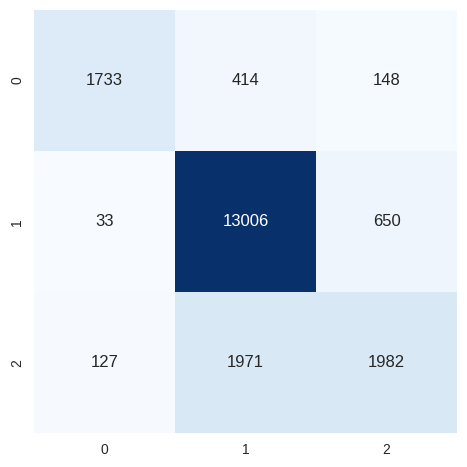

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

###### Explane results using Shap

In [ ]:
explainer_xgb = shap.Explainer(model_xgb,x_train)

NameError: ignored

In [ ]:
shap_values = explainer_xgb.shap_values(x_test)

100%|===================| 60169/60192 [13:34<00:00]       

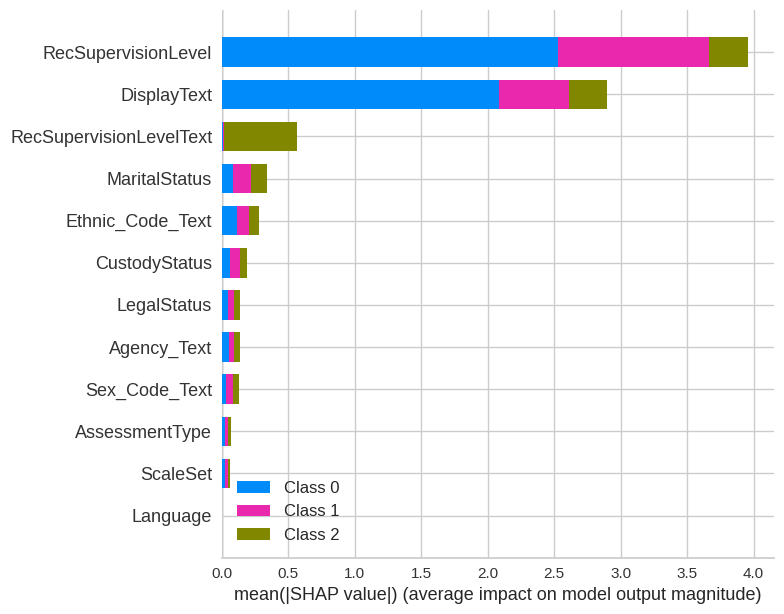

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=1)
    importance_df = pd.DataFrame([X.columns, shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 

In [ ]:
model_xgb

In [ ]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=0)
    importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 


In [ ]:
shap_feature_importance(shap_values , x_train)

,column_name,shap_importance
13918,None,"[0.17915886222266028, 0.00952588102783314, 0.0..."
5853,None,"[0.17915886222266028, 0.00952588102783314, 0.0..."
5617,None,"[0.17915886222266028, 0.00952588102783314, 0.0..."
19713,None,"[0.17915886222266028, 0.00952588102783314, 0.0..."
11692,None,"[0.17915886222266028, 0.00952588102783314, 0.0..."
...,...,...
6813,None,"[0.006113031086909662, 0.0643741170007282, 0.0..."
8814,None,"[0.006113031086909662, 0.0643741170007282, 0.0..."
83,None,"[0.006113031086909662, 0.0643741170007282, 0.0..."
3065,None,"[0.006113031086909662, 0.0643741170007282, 0.0..."


In [ ]:
def shap_feature_importance_plot(values, X):
    shap.summary_plot(shap_values, X)
    return


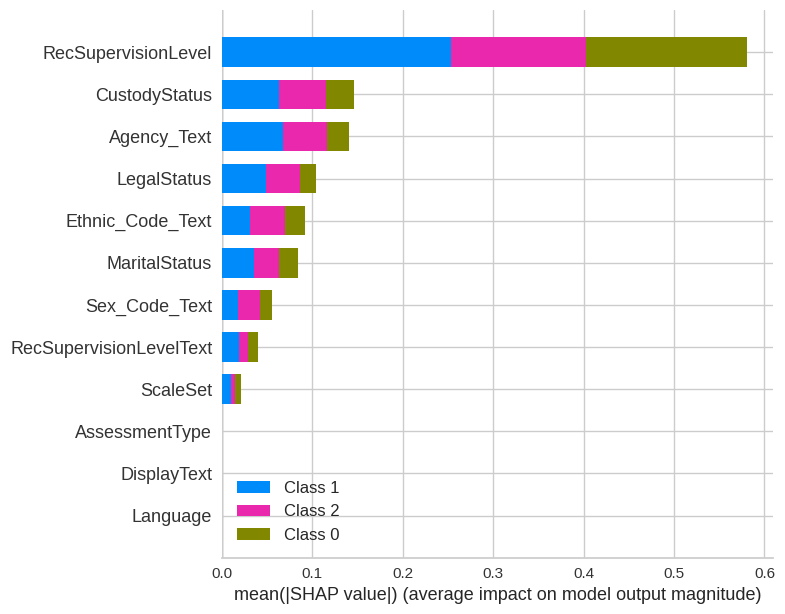

In [ ]:
shap_feature_importance_plot(shap_values , x_train) 

In [ ]:
def shap_dependance_plot(feature1, values, X, feature2 = None):
    if feature2 is None:
        shap.dependence_plot(feature1, values, X)
    else :
        shap.dependence_plot(feature1, values, X, interaction_index=feature2)
    return


In [ ]:
shap_values_np = np.array(shap_values)

In [ ]:
shap_values_np.shape

(3, 20064, 12)

In [ ]:
x_train.shape

(40734, 12)

In [ ]:
for feature in shap_feature_importance(shap_values_np, x_train).column_name.tolist():
    shap_dependance_plot(feature, shap_values_np, x_train)

IndexError: ignored

In [ ]:
def shap_force_plot(explainer, values, X):
    """
    shap_value can be an element of explainer.shap_values(train_X) or subset
    """
    shap.initjs()
    display(shap.force_plot(explainer.expected_value, values, X))

    return


In [ ]:
y_train = y_train.reset_index()

In [ ]:
y_train.loc[0]

index        3728
ScoreText       2
Name: 0, dtype: int64

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
shap_values = pd.DataFrame(shap_values)#.iloc[index,:]

ValueError: ignored

In [ ]:
index = 1
print("Real value is :",y_train.loc(index))
print("Predicted value is :", y_pred.loc(index))
#shap_force_plot(explainer, shap_values[index], x_train.iloc[index,:])
shap.force_plot(explainer.expected_value[1], shap_values[1])

Real value is : <pandas.core.indexing._LocIndexer object at 0x7fc305fcfab0>
Predicted value is : <pandas.core.indexing._LocIndexer object at 0x7fc305fcfec0>


In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1])

NameError: ignored